# Blue Bikes Ridership Modeling
*Finnley Autumn Rogers* | 2024-08-27


In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [65]:
# read data
bb_2021 = pd.read_csv("data/bb2021_rideData.csv")
bb_2022 = pd.read_csv("data/bb2022_rideData.csv")
bb_2023 = pd.read_csv("data/bb2023_rideData.csv")
bb_2024 = pd.read_csv("data/bb2024_rideData.csv")


/var/folders/90/jnz1wg4x0bv_6ys9t9zfk_p40000gn/T/ipykernel_26107/1368606908.py:4: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  bb_2023 = pd.read_csv("data/bb2023_rideData.csv")


In [70]:
train = pd.concat([bb_2021, bb_2022, bb_2023])[['started_at', 'ended_at']]

In [71]:
train.head()

,started_at,ended_at
0,2021-01-01 00:00:04.5900,2021-01-01 00:15:19.1680
1,2021-01-01 00:00:21.8030,2021-01-01 00:18:27.4640
2,2021-01-01 00:00:26.0090,2021-01-01 00:16:12.0900
3,2021-01-01 00:00:30.9210,2021-01-01 00:06:26.6000
4,2021-01-01 00:01:11.2270,2021-01-01 00:09:43.1950


In [72]:
train['startdate'] = train["started_at"].apply(lambda x: x.split(" ")[0])

In [73]:
train.head(2)

,started_at,ended_at,startdate
0,2021-01-01 00:00:04.5900,2021-01-01 00:15:19.1680,2021-01-01
1,2021-01-01 00:00:21.8030,2021-01-01 00:18:27.4640,2021-01-01


In [74]:
train.startdate = pd.to_datetime(train.startdate).dt.date

In [75]:
train.head(2)

,started_at,ended_at,startdate
0,2021-01-01 00:00:04.5900,2021-01-01 00:15:19.1680,2021-01-01
1,2021-01-01 00:00:21.8030,2021-01-01 00:18:27.4640,2021-01-01


In [76]:
train = train[['startdate', 'started_at']].groupby("startdate").count().reset_index()

In [77]:
train.head(2) # delightful

,startdate,started_at
0,2021-01-01,1894
1,2021-01-02,1720


In [68]:
test = bb_2024[['started_at', 'ended_at']]

test['startdate'] = test["started_at"].apply(lambda x: x.split(" ")[0])
test.startdate = pd.to_datetime(test.startdate).dt.date
test = test[['startdate', 'started_at']].groupby("startdate").count().reset_index()

/var/folders/90/jnz1wg4x0bv_6ys9t9zfk_p40000gn/T/ipykernel_26107/262363190.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['startdate'] = test["started_at"].apply(lambda x: x.split(" ")[0])
/var/folders/90/jnz1wg4x0bv_6ys9t9zfk_p40000gn/T/ipykernel_26107/262363190.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.startdate = pd.to_datetime(test.startdate).dt.date


In [69]:
test.head(2)

,startdate,started_at
0,2024-01-01,2677
1,2024-01-02,4597


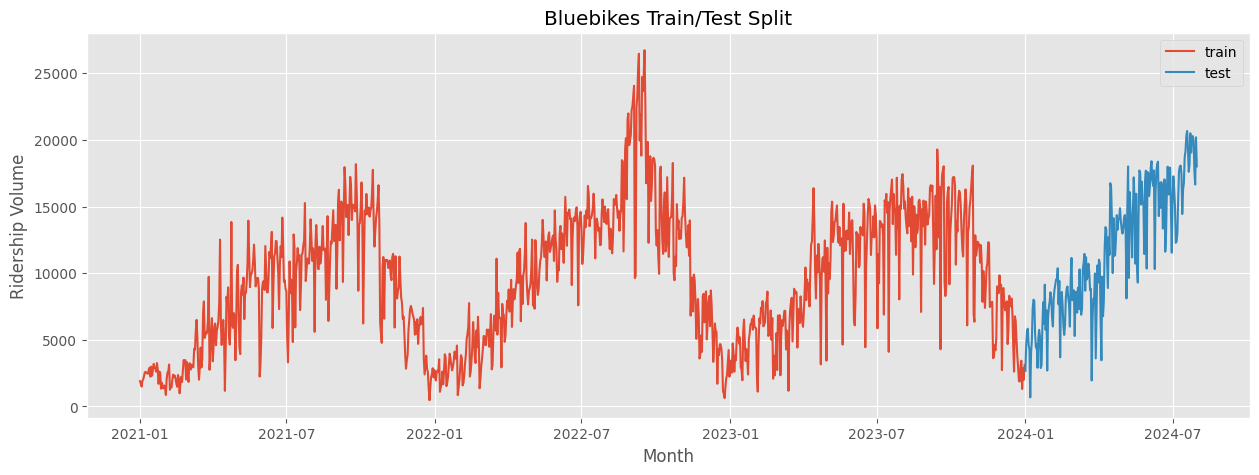

In [83]:
plt.rcParams["figure.figsize"] = (15,5)

plt.plot(train.startdate, train.started_at, label = 'train')
plt.plot(test.startdate, test.started_at, label = 'test')
plt.legend()

plt.title("Bluebikes Train/Test Split")
plt.xlabel("Month")
plt.ylabel("Ridership Volume")

plt.show()

There's clearly 2 kinds of seasonality a model would need to deal with - yearly and weekly. We can look at the rolling averages for both to see the trends exhibited.